# Comparing line plots of electrocardiogram waveforms
### Let's compare the waveforms of ECG from an individual with an arrhythmia to ones from an individual without any diagnosed arrhythmia

#### Created by Deborah Won

### First load in the normal sinus rhythm ECG and separate out the time variable from the ECG

In [2]:
# What do you need to import?


In [39]:
# Fill in the blank: read in the ecg1min.csv file

data = 

In [40]:
# QUESTION:  How do we find out what variables are stored in this data file? What are the variables in this file?


Index(['time', 'Vecg'], dtype='object')

In [42]:
# Fill in the blanks: Extract time and ecg into separate variables
time = 
ecg = 

## Finding the average ECG profile

In [8]:
# Import more libraries needed to visualize and analyze the data
import matplotlib.pyplot as plt

import matplotlib as mp

from scipy.signal import find_peaks

import numpy as np

### First look at the normal sinus ECG and detect peaks

Text(0.5, 0, 'time (s)')

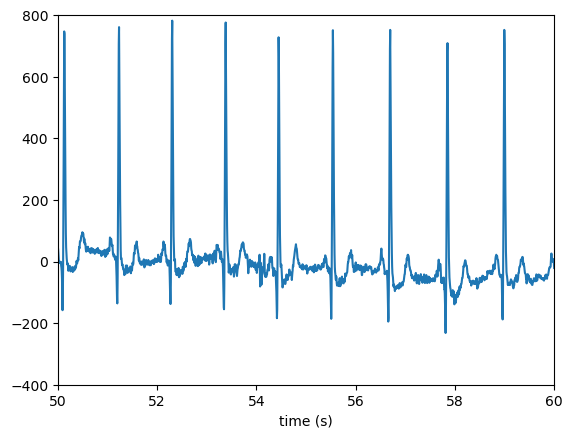

In [43]:
# Fill in the blanks: Plot the ecg waveform versus time in seconds
plt.plot

# Zoom in on a few heart beats using the "axis" class
plt.axis([50, 60, -400, 800])

# Fill in the blanks: Label the x and y axis with appropriate labels that include units
plt.xlabel


# QUESTION - Looking at the plot, how would you decribe the ECG of this patient?  What would you estimate the heart rate to be?

In [1]:
# Fill in the blanks: 
# Detect peaks in ECG and show that we've detected the peaks, using a height of 200 and prominence of 200.
# Look up help documentation to determine how to set those input parameters of height and prominance.
peaks, properties = find_peaks(ecg,

# Fill in the blanks: Plot ecg vs time again. But on that same plot, 
                               
plt.plot(time[peaks], ecg[peaks], 'r*')

SyntaxError: '(' was never closed (735933101.py, line 3)

In [55]:
# QUESTION: What does N represent?  
N = len(peaks)
print(N)


79


In [56]:
# QUESTION: What is the heart rate in beats per minute?  
# Write code to obtain the answer and then print a statement of what the heart rate is.

L = len(time)

# Fill in the blank: find the total time by indexing the last point in the time vector
T = 
print(T)

# Fill in the blank: How will we use variables we have now defined to comput the heart rate in beats per minute? 
hr = 

# Fill the blank: Output a statement stating what the heart rate is to 1 decimal point in bpm
print(

83.33333333
hr = 56.880000002275196bpm


In [57]:
# profileArray is a function that generates an array of ECG waveforms during a heartbeat. 
# We extract 1 second of the ECG waveform around each QRS peak and store these 1-sec segments in an array: 
# starting at 400ms before the detected peak to 600ms after the peak

def profileArray(ecg, Npeaks, fs):
    tpre = round(0.4*fs)  # number of samples in 400ms
    tpost = round(0.6*fs)  # number of samples in 600ms
    ecgArray = []
    for i in range(1,Npeaks-1):  # leave out first and last, in case not enough samples before 1st one or after last one for tpre and tpost
        ecg_i = ecg[peaks[i]-tpre:peaks[i]+tpost]
        ecgArray.append(ecg_i)
    ecgArray = np.array(ecgArray)
    
    return(ecgArray)

In [58]:
# Now let's find the average ECG profile during a heartbeat during normal sinus rhythm
# QUESTION: What is the output of profile Array? What type of variable, and what are the dimensions?
# QUESTION: Explain what the dimensions of qrs tell us? What do they represent in terms of the problem of creating the average ECG profile?
fs = 250
qrs = profileArray(ecg, N, fs)
print(type(qrs))
print(qrs.shape)

<class 'numpy.ndarray'>
(77, 250)


In [59]:
# Fill in the blank: Find the average ECG profile but read question below and look at help documentation
# QUESTION: Along which axis should the average be taken?  Why?
avgECG = np.mean(qrs, 
                 
# Fill in the blank and QUESTION: What are the dimensions of avgECG?


(250,)

In [60]:
# Create a time vector that represents the # of ms relative to the QRS peak.
tpre = round(0.4*fs)  # number of samples in 400ms
tpost = round(0.6*fs)  # number of samples in 600ms
tSeg = np.arange(-tpre, tpost, 1)
tSeg = tSeg/fs

Text(0.5, 0, 'time (s)')

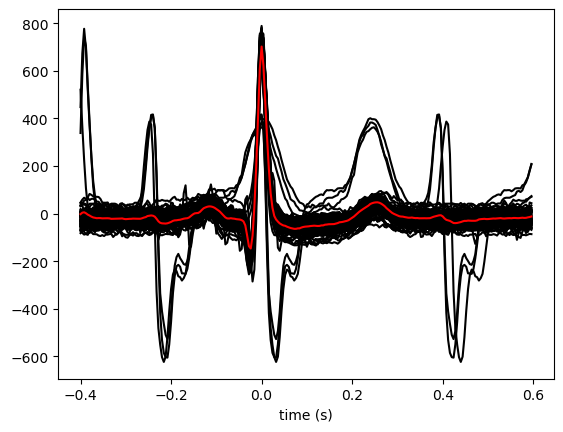

In [61]:
#Let's plot the average ECG profile in red on top of the individual heartbeat waveforms in black
# Fill in the blanks: add appropriate x- and y-axis labels with units. the ECG voltages are in mV.
# QUESTION: Would you say in general there seems to be a stereotypical pattern in the ECG waveform during normal sinus rhythm?
# Explain your answer.
plt.plot(tSeg, np.transpose(qrs), 'k')
plt.plot(tSeg, avgECG, 'r')




## Now, let's find the average profile for the ECG from the individual with arrhythmia

In [24]:
# Fill in the blanks: Read in the .csv file arrhythmia5.csv into a dataframe called arrhythDF


arrhythDF = 

In [25]:
# Fill in the blank: Again, figure out the column names


Index(['t', 'ECGArrhyth5'], dtype='object')

In [28]:
# Fill in the blanks: Store time and the ECG in separate variables
t = 
ecgArr = 

(10.0, 13.0, -500.0, 1200.0)

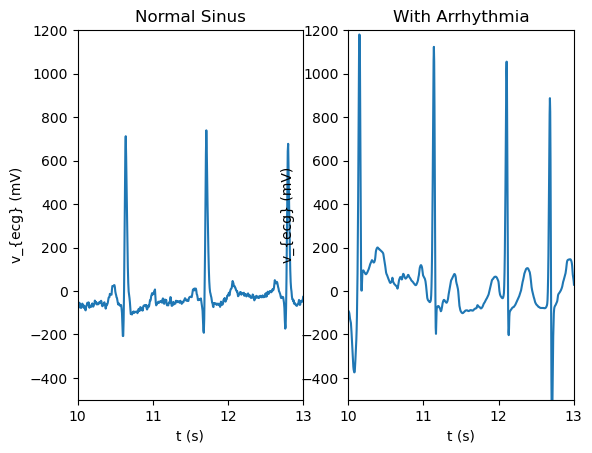

In [63]:
# Fill in the blanks: 
# Plot the normal sinus and arrhythmic ECG in two side-by-side subplots, zooming in on a few seconds of the signal

plt.subplot(1,2,1)
   # plot the signal indicated by the title of the plot
   # label x axis
   # label y axis
plt.title('Normal Sinus')
plt.axis([10, 13, -500, 1200])

plt.subplot(1,2,2)
   # plot the signal indicated by the title of the plot
   # label x axis
   # label y axis
plt.title('With Arrhythmia')
plt.axis([10, 13, -500, 1200])

In [65]:
# Fill in the blank: Find the peaks and the average profile for a heartbeat of the arrhythmic ECG 
# Need to obtain the peaks to pass into profileArray

peaks, properties =  

Npeaks = len(peaks)



(250,)

In [66]:
fs = 250
qrsArrhyth = profileArray(ecgArr, Npeaks, fs)

# Fill in the blank to obtain the average profile of ECG during arrhythmia
avgECGArrhyth = 

Text(0.5, 1.0, 'with arrhythmia')

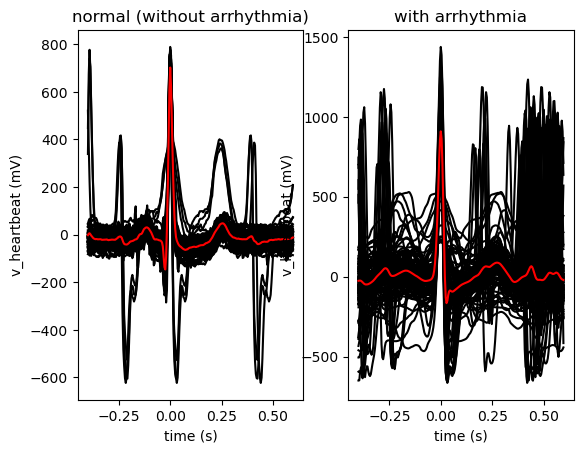

In [69]:
# Fill in the blanks: Plot the ECG segments and the average ECG superimposed in red. 
# Do this for normal (without arrhythmia) and with arrhythmia in side by side subplots

plt.subplot(1,2,1)
plt.plot(tSeg, np.transpose(qrs), 'k')
plt.plot

plt.xlabel('time (s)')
plt.ylabel('v_heartbeat (mV)')
plt.title('normal (without arrhythmia)')
plt.axis([-0.25 0.5 -650 1500])

plt.subplot(1,2,2)
plt.plot(tSeg, np.transpose(qrsArrhyth), 'k')
plt.plot(
         
plt.xlabel('time (s)')
plt.ylabel('v_heartbeat (mV)')
plt.title('with arrhythmia')
plt.axis([-0.25 0.5 -650 1500])

In [ ]:
# QUESTION: How does the ECG with arrhythmia compare to the ECG during normal sinus rhythm?
# What can you say about the effect of arrhythmia?
# How would you quantify these differences?

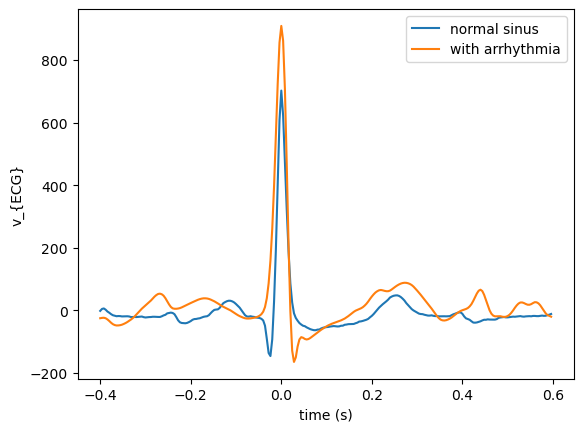

In [70]:
# Overlay the average ECG with and without arrhthmia
# QUESTION What differences do you notice between the two?
plt.plot(tSeg, avgECG)
plt.plot(tSeg, avgECGArrhyth)
ax = plt.gca()
ax.set_xlabel('time (s)')
ax.set_ylabel('v_{ECG}')
ax.legend(['normal sinus', 'with arrhythmia'])

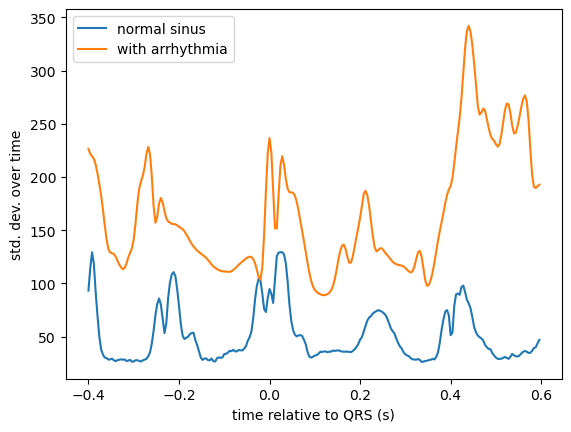

In [71]:
# Compare the standard deviation (or variability) over the course of the heartbeat during normal sinus rhythm vs. arrhythmia
sdECG = np.std(qrs, axis=0)
plt.plot(tSeg, sdECG)

# Complete the code 
sdArr = 
plt.plot

ax = plt.gca()
ax.set_xlabel('time relative to QRS (s)')
ax.set_ylabel('std. dev. over time')
ax.legend(['normal sinus', 'with arrhythmia'])

In [ ]:
# QUESTION: Given this new plot, how would you describe the difference between the ECG in normal sinus rhythm and during arrhythmia?